In [10]:
import pandas as pd

In [11]:
def load_dataframe(filepath, n_ejemplos=None):
    if n_ejemplos is None:
        return pd.read_pickle(filepath)
    else:
        return pd.read_pickle(filepath).head(n_ejemplos)

In [12]:
EJEMPLOS = 25
file_path = '../datos/df_final_limpio.pkl'
df = load_dataframe(file_path)

In [13]:
df

,imagen,vel alambre,flujo gas,peri voltaje,voltaje,corriente,ubicacion,pixeles,mm_por_pixel,punto_referencia_x,punto_referencia_y,matriz
0,Cordon11_Seccion 1 horizontal C11.jpg,5,12,5,21,151,1,196.002551,65.334184,442,298,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1...."
1,Cordon12_Seccion 1 horizontal C12.jpg,4,12,4,20,122,1,197.002538,65.667513,428,244,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1...."
2,Cordon17_Seccion 1 horizontal C17.jpg,4,12,5,17,130,1,176.002841,58.667614,401,310,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1...."
3,Cordon8_Seccion 1 horizontal C8.jpg,2,12,3,20,60,1,95.005263,31.668421,359,155,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0...."
4,Cordon3_Seccion 1 horizontal C3.jpg,3,12,5,21,131,1,128.003906,42.667969,460,246,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1...."
5,Cordon19_Seccion 1 horizontal C19.jpg,5,12,2,17,120,1,182.000000,60.666667,380,317,"[[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1...."
6,Cordon9_Seccion 1 horizontal C9.jpg,2,12,2,20,58,1,171.000000,57.000000,431,275,"[[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0...."
7,Cordon6_Seccion 1 horizontal C6.jpg,2,12,4,20,56,1,110.004545,36.668182,457,184,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0...."
8,Cordon4_Seccion 1 horizontal C4.jpg,3,12,2,16,55,1,121.000000,40.333333,424,224,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0...."
9,Cordon10_Seccion 1 horizontal C10.jpg,5,12,3,18,145,1,204.002451,68.000817,442,308,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1...."


In [14]:
columnas_entrada = ['vel alambre', 'flujo gas', 'peri voltaje', 'voltaje', 'corriente', 'ubicacion']
columna_salida = 'matriz'

X = df[columnas_entrada]
y = df[columna_salida]

In [15]:
print(X.shape)
print(y.shape)

(54, 6)
(54,)


In [16]:
print(X.dtypes)
print('\n')
print(y.dtypes)

vel alambre     int64
flujo gas       int64
peri voltaje    int64
voltaje         int64
corriente       int64
ubicacion       int64
dtype: object


object


In [17]:
print(y.shape)

(54,)


In [18]:
import numpy as np

# Convertir y a un array de NumPy si es una serie de pandas
y_array = np.array(y.tolist())  # Usar tolist() para manejar listas de arrays
print(f"Tipo de y_array después de conversión: {y_array.dtype}")

# Aplanar y_array de (n_samples, 8, 5) a (n_samples, 40)
y_flat = y_array.reshape(y_array.shape[0], -1)
print(f"La nueva forma de y_flat es: {y_flat.shape}")


Tipo de y_array después de conversión: float64
La nueva forma de y_flat es: (54, 40)


In [19]:
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de entranamiento y testeo

X_train, X_test, y_train, y_test= train_test_split(
    X, y_flat, test_size=0.2, random_state=42
)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (43, 6)
Forma de X_test: (11, 6)
Forma de y_train: (43, 40)
Forma de y_test: (11, 40)


In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir hiperparametros
LEARNING_RATE = 0.0001
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)
ACTIVATION = 'tanh'

# Arquitectura del modelo
model = Sequential([
    Dense(1024, activation=ACTIVATION, input_shape=(X.shape[1],)),
    #Dense(64, activation=ACTIVATION),
    Dense(40, activation='sigmoid')
])

# Compilar modelo
model.compile(optimizer=OPTIMIZER, loss='mean_squared_error', metrics=['mean_absolute_error'])

#### ***Batch_size***

-  0 --> Utiliza todo el conjunto en cada iteración
-  1 --> Utiliza solo un muestra en cada iteración
-  n -->  Utiliza n muestras en cada iteración 

Final del entrenamiento: 0.01279


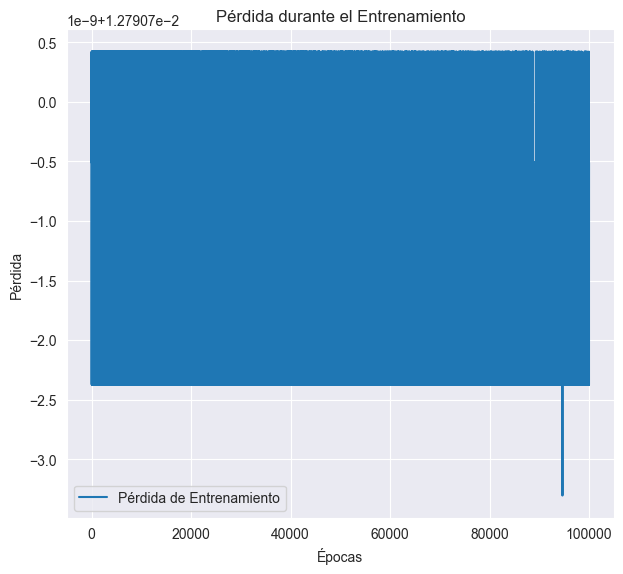

In [25]:
import matplotlib.pyplot as plt

# Entrenar el modelo
EPOCHS = 100000
BATCH_SIZE = 0

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)

loss = history.history['loss']
print(f"Final del entrenamiento: {loss[-1]:.5f}")

# Graficar pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el Entrenamiento')

plt.tight_layout()
plt.show()

In [26]:
y_pred = model.predict(X_test)
loss_test = model.evaluate(X_test, y_test, verbose=0,)

print(f"Pérdida en el conjunto de prueba: {loss_test}")

1/1 [==============================] - 1s 620ms/step
Pérdida en el conjunto de prueba: [0.2533721625804901, 0.26519304513931274]


In [ ]:
import numpy as np

threshold = 0.5
# 1. Validar un ejemplo del conjunto de entrenamiento
index_train = 1
example_train = X_train.iloc[index_train].values.reshape(1, -1)
true_value_train = y_train[index_train]

# Realiza la predicción
predicted_value_train = model.predict(example_train)

# Aplicar umbral para obtener valores binarios
predicted_binary_train = (predicted_value_train > threshold).astype(int)

# Imprime el ejemplo, el valor verdadero y la predicción
print("Ejemplo del conjunto de entrenamiento:")
print("Entrada:", example_train)
print("Valor verdadero:", true_value_train)
print("Predicción (binaria):", predicted_binary_train.flatten())

# 2. Validar un ejemplo del conjunto de testeo
index_test = 1
example_test = X_test.iloc[index_test].values.reshape(1, -1)
true_value_test = y_test[index_test]

# Realiza la predicción
predicted_value_test = model.predict(example_test)

# Aplicar umbral para obtener valores binarios
predicted_binary_test = (predicted_value_test > threshold).astype(int)

# Imprime el ejemplo, el valor verdadero y la predicción
print("\nEjemplo del conjunto de testeo:")
print("Entrada:", example_test)
print("Valor verdadero:", true_value_test)
print("Predicción (binaria):", predicted_binary_test.flatten())

* Evaluar conjunto test entrenando con parametros optimos
* Plotear prediccion en imagen, unir centro de las grillas que dan 1 para conjunto test
* Escribir:
* - Resumen 
- Descripcion de los datos contados imagenes
- Contar como fueron obtenidos sobres las images
- Expereminta, parmetros mejores
- Evaluacion conjunto de entrenamiento
- Ploteo sobres las images